# Question_1

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.


# Algo

- Create a function called removeLoop that takes a linked list as input.
- Initialize two pointers, slowPtr and fastPtr, both pointing to the head of the linked list.
- Move slowPtr one step at a time and fastPtr two steps at a time until they meet or fastPtr becomes NULL.
    - If fastPtr becomes NULL, there is no loop in the linked list, so return 0.
    - If slowPtr and fastPtr meet, it indicates the presence of a loop.
- Set slowPtr back to the head of the linked list and move both slowPtr and fastPtr one step at a time until they meet again. This time, move both pointers at the same pace.
- When slowPtr and fastPtr meet, it indicates the starting point of the loop.
- To remove the loop, make the next pointer of the node where fastPtr is pointing to NULL.
- Return 1 to indicate that the loop has been successfully removed.

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def removeLoop(head):
    if head is None or head.next is None:
        return 0

    slowPtr = head
    fastPtr = head

    # Move slowPtr one step at a time and fastPtr two steps at a time
    while fastPtr is not None and fastPtr.next is not None:
        slowPtr = slowPtr.next
        fastPtr = fastPtr.next.next
        if slowPtr == fastPtr:
            break

    # If fastPtr becomes NULL, no loop exists
    if fastPtr is None or fastPtr.next is None:
        return 0

    # Move slowPtr back to the head and move both pointers one step at a time
    slowPtr = head
    while slowPtr.next != fastPtr.next:
        slowPtr = slowPtr.next
        fastPtr = fastPtr.next

    # Remove the loop
    fastPtr.next = None
    return 1

# Create the linked list
head = Node(1)
head.next = Node(3)
head.next.next = Node(4)
head.next.next.next = head.next

# Call the removeLoop function
result = removeLoop(head)
print("Loop removed:", result)

# Print the updated linked list
current = head
while current:
    print(current.data, end=" ")
    current = current.next


Loop removed: 1
1 3 4 

In [2]:
# Create the linked list
head = Node(1)
head.next = Node(8)
head.next.next = Node(3)
head.next.next.next = Node(4)

# Call the removeLoop function
result = removeLoop(head)
print("Loop removed:", result)

Loop removed: 0


- Time Complexity: O(N), where N is the number of nodes in the linked list.
- Space Complexity: O(1), as we are using a constant amount of extra space.

# Question_2

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

- **Example 1:**
Input:
LinkedList: 4->5->6
Output:457
- Example 2:
Input:
LinkedList: 1->2->3
Output:124

- Initialize a carry variable as 1.
- Traverse the given linked list in reverse order (from right to left).
- For each node, add the carry value to its data.
    - If the sum is less than 10, update the node's data with the sum and set the carry to 0.
    - If the sum is equal to or greater than 10, update the node's data with the sum modulo 10 and set the carry to 1.
- If there is still a carry after traversing all the nodes, create a new node with the carry as its data and add it as the new head of the linked list.
- Reverse the linked list to get the final result.
- Convert the linked list into an integer.
- Return the integer as the output.

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def addOne(head):
    # Reverse the linked list
    prev = None
    current = head
    while current is not None:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    head = prev

    # Add 1 to the linked list
    carry = 1
    current = head
    while current is not None:
        sum = current.data + carry
        if sum < 10:
            current.data = sum
            carry = 0
        else:
            current.data = sum % 10
            carry = 1
        current = current.next

    # Handle remaining carry if present
    if carry > 0:
        new_node = Node(carry)
        new_node.next = head
        head = new_node

    # Reverse the linked list again
    prev = None
    current = head
    while current is not None:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    head = prev

    # Convert linked list to integer
    result = 0
    current = head
    while current is not None:
        result = result * 10 + current.data
        current = current.next

    return result

# Create the linked list
head = Node(4)
head.next = Node(5)
head.next.next = Node(6)

# Call the addOne function
result = addOne(head)
print("Output:", result)


Output: 457


- Time Complexity: O(N), where N is the number of nodes in the linked list.
- Space Complexity: O(1), as we are using a constant amount of extra space.

# Question_3

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

```
Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

```

**Example 2:**
Input:
5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30
Output: 5->7->8->10->19->22->28->30->50
Explanation:
The resultant linked lists has every
node in a single level.

(Note:| represents the bottom pointer.)

# Algo

- Create a function called flattenLinkedList that takes the head of the linked list as input.
- Initialize a new linked list called result with a dummy node.
- Initialize a pointer called current and set it to result.
- Traverse the given linked list starting from the head.
    - For each node, traverse the sub-linked list using the bottom pointer.
    - Connect each node to the result list in a sorted manner.
    - Update the current pointer to the last node of the result list.
- Return the flattened linked list by accessing the next pointer of the dummy node.

In [5]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.bottom = None

def mergeSortedLists(list1, list2):
    dummy = Node(0)
    tail = dummy

    while list1 is not None and list2 is not None:
        if list1.data <= list2.data:
            tail.bottom = list1
            list1 = list1.bottom
        else:
            tail.bottom = list2
            list2 = list2.bottom
        tail = tail.bottom

    if list1 is not None:
        tail.bottom = list1
    else:
        tail.bottom = list2

    return dummy.bottom

def flattenLinkedList(head):
    if head is None or head.next is None:
        return head

    head.next = flattenLinkedList(head.next)
    head = mergeSortedLists(head, head.next)

    return head

def printLinkedList(head):
    current = head
    while current is not None:
        print(current.data, end="-> ")
        current = current.bottom
    print("None")

# Create the linked list
head = Node(5)
head.next = Node(10)
head.next.next = Node(19)
head.next.next.next = Node(28)

head.bottom = Node(7)
head.bottom.bottom = Node(8)
head.bottom.bottom.bottom = Node(30)

head.next.bottom = Node(20)

head.next.next.bottom = Node(22)
head.next.next.next.bottom = Node(35)

head.next.next.bottom = Node(50)

head.next.next.bottom.bottom = Node(40)
head.next.next.bottom.bottom.bottom = Node(45)

# Flatten the linked list
flattened = flattenLinkedList(head)

# Print the flattened linked list
printLinkedList(flattened)


5-> 7-> 8-> 10-> 19-> 20-> 28-> 30-> 35-> 50-> 40-> 45-> None


- Time Complexity: O(N*M), where N is the number of nodes in the main linked list and M is the average number of nodes in each sub-linked list.
- Space Complexity: O(1), as we are using a constant amount of extra space.

# Question_4

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.
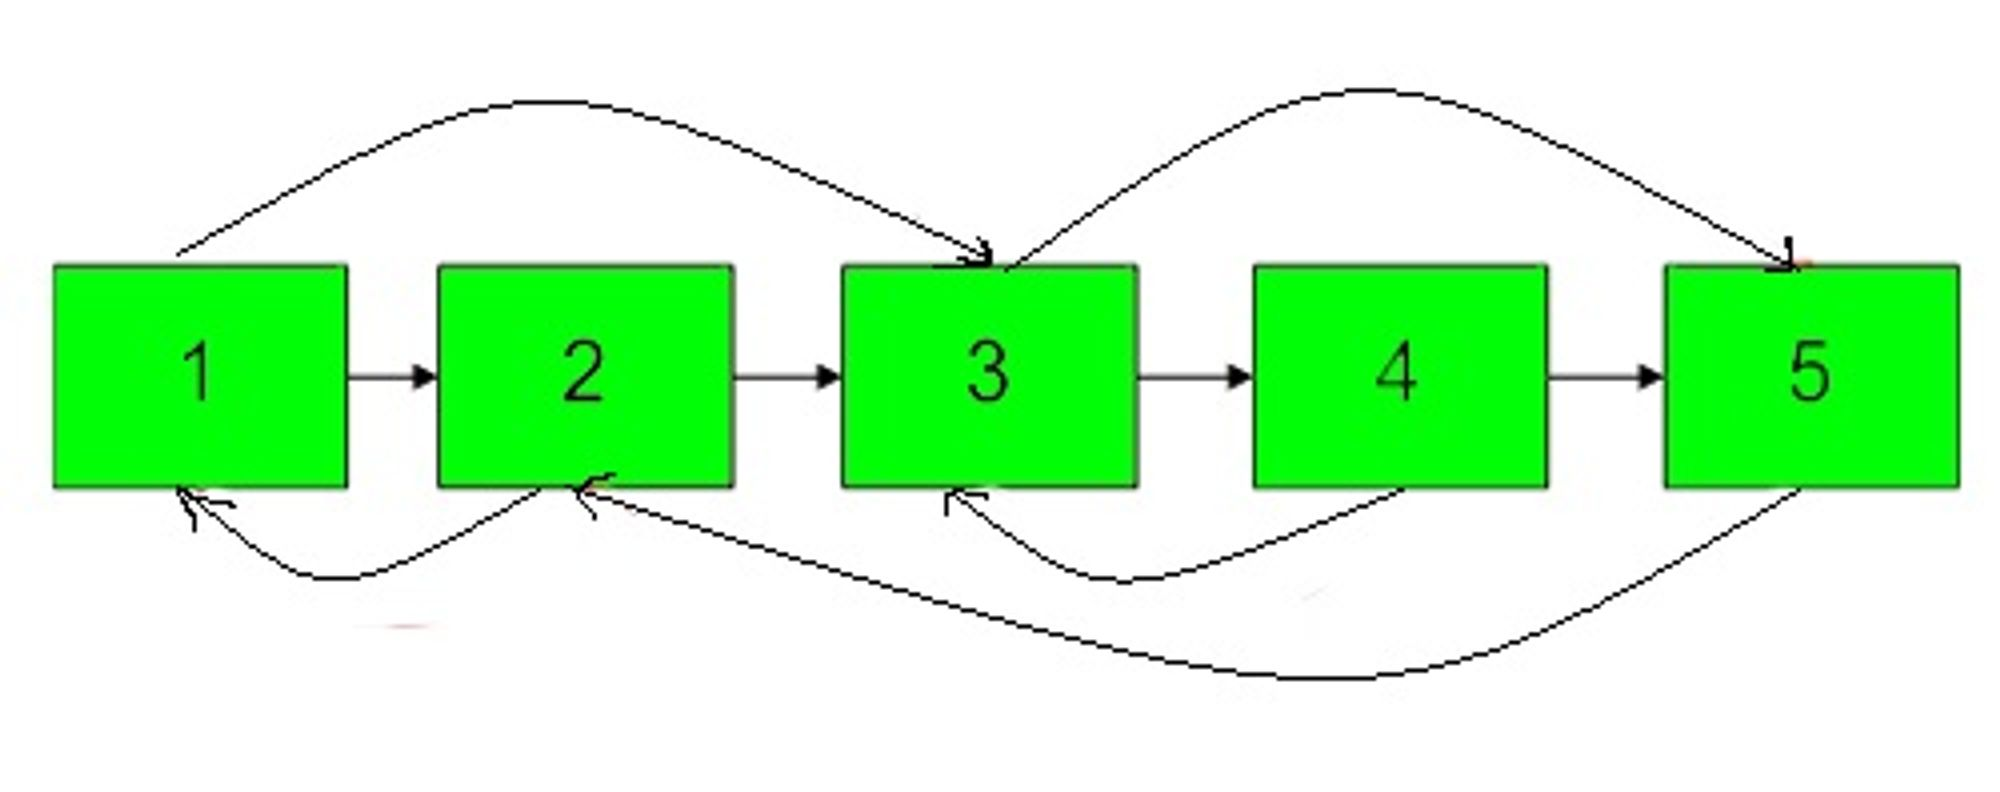
**Note** :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1:**

```
Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1
Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

```

**Example 2:**
Input:
N = 4, M = 2
value = {1,3,5,9}
pairs = {{1,1},{3,4}}
Output:1
Explanation:In the given testcase ,
applying the method as stated in the
above example, the output will be 1.

# Algo

- Create a function called copyRandomList that takes the head of the original linked list as input.
- Create a dictionary called nodeDict to store the mapping between original nodes and their corresponding new nodes.
- Traverse the original linked list and create a new node for each original node. Set the value of the new node as the same value of the original node.
- Store the mapping between the original node and the new node in the nodeDict dictionary.
- Traverse the original linked list again and for each original node, set the next pointer of its corresponding new node using the nodeDict dictionary.
- Traverse the original linked list again and for each original node, set the random pointer of its corresponding new node using the nodeDict dictionary.
- Return the head of the new copied linked list.

# Question_5

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

**Example 1:**

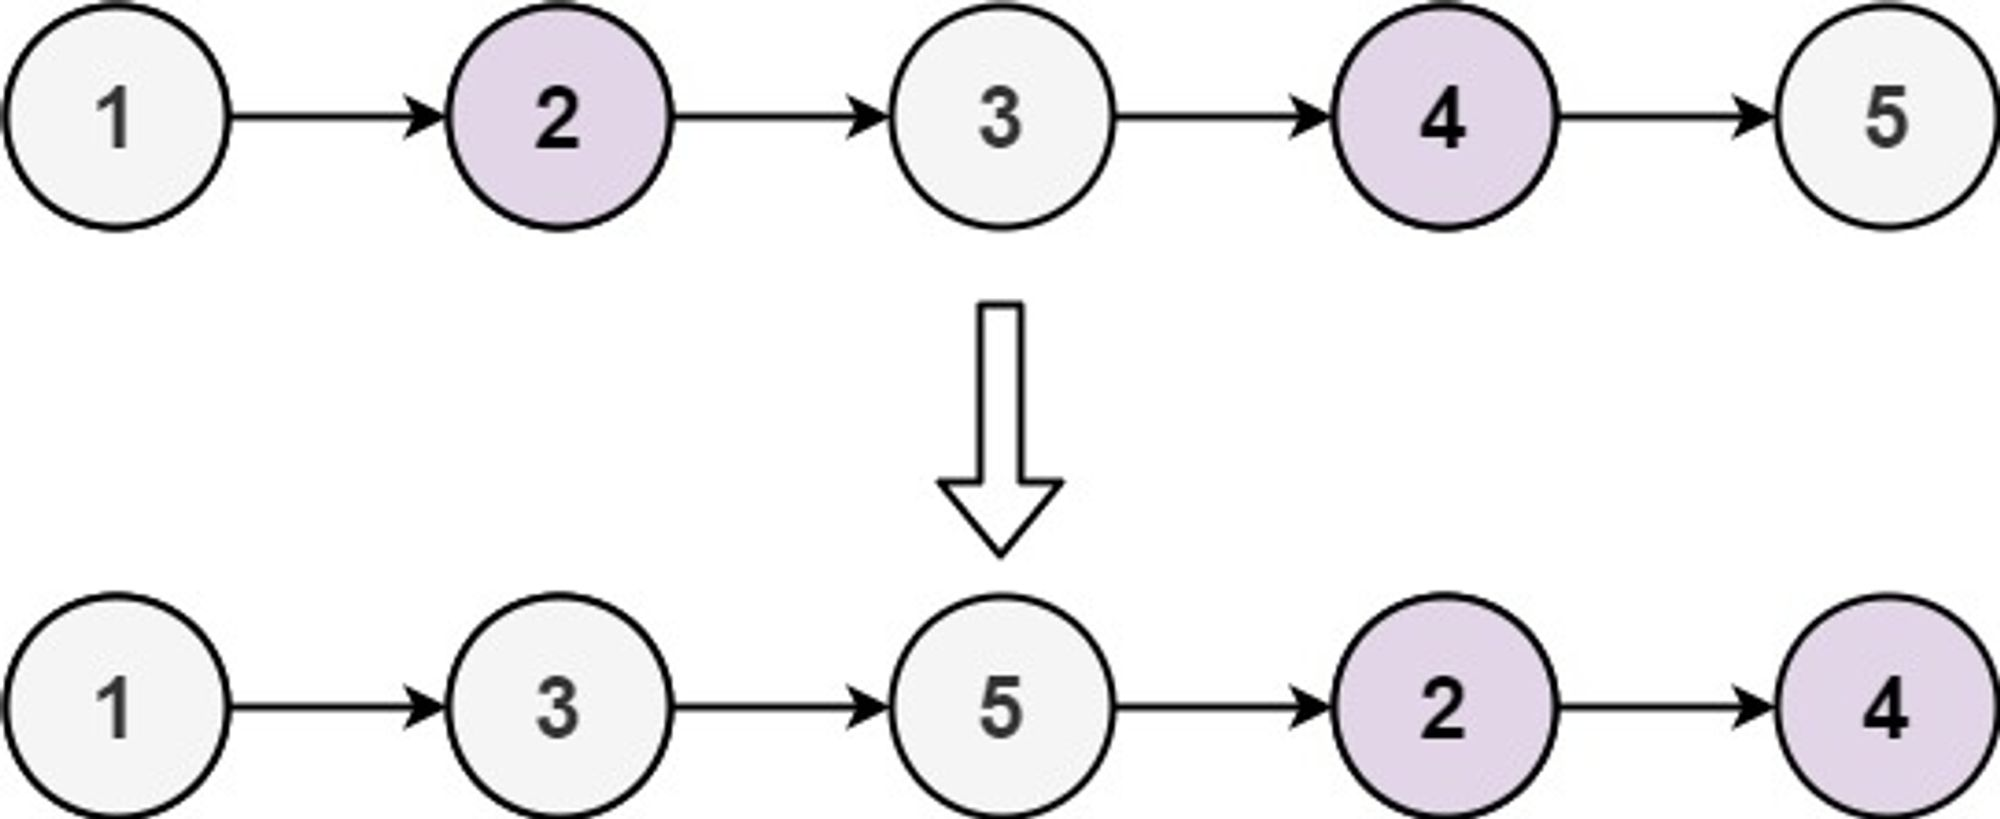

```
Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

```

**Example 2:**


```
Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]

# Algo

- Create two pointers oddHead and evenHead to track the heads of the odd and even sublists respectively.
- Initialize oddHead as the head of the original list and evenHead as the next node of oddHead.
- Create two pointers odd and even to traverse the odd and even sublists respectively. Set odd as oddHead and even as evenHead.
- Traverse the original list using the odd pointer with a step size of 2, and for each node, connect its next pointer to the next odd node.
- Traverse the original list using the even pointer with a step size of 2, and for each node, connect its next pointer to the next even node.
- Connect the last node of the odd sublist (odd) to the head of the even sublist (evenHead) to merge the two sublists.
- Return oddHead, which is the head of the reordered list.

In [10]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if not head or not head.next:
        return head

    oddHead = head
    evenHead = head.next
    odd = oddHead
    even = evenHead

    while odd and odd.next and even and even.next:
        odd.next = odd.next.next
        odd = odd.next
        even.next = even.next.next
        even = even.next

    odd.next = evenHead

    return oddHead


In [11]:
# Example 1
head1 = ListNode(1)
head1.next = ListNode(2)
head1.next.next = ListNode(3)
head1.next.next.next = ListNode(4)
head1.next.next.next.next = ListNode(5)

reordered1 = oddEvenList(head1)
current = reordered1
while current:
    print(current.val, end=" ")
    current = current.next
# Output: 1 3 5 2 4
print()

# Example 2
head2 = ListNode(2)
head2.next = ListNode(1)
head2.next.next = ListNode(3)
head2.next.next.next = ListNode(5)
head2.next.next.next.next = ListNode(6)
head2.next.next.next.next.next = ListNode(4)
head2.next.next.next.next.next.next = ListNode(7)

reordered2 = oddEvenList(head2)
current = reordered2
while current:
    print(current.val, end=" ")
    current = current.next
# Output: 2 3 6 7 1 5 4
print()


1 3 5 2 4 
2 3 6 7 1 5 4 


- The time complexity of this algorithm is O(n) since we traverse the list once. 
- The space complexity is O(1) as we only use a constant amount of additional space for the pointers.


# Question_6

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**

```
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

```

**Example 2:**
 ```
Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4
    ```

# Algo

- If k is 0 or the linked list is empty, return the head as it is.
- Initialize a pointer current to the head of the linked list and count to 1.
- Traverse the linked list until count becomes k or the end of the list is reached.
- If the end of the list is reached and count is still less than k, wrap around to the head and set count to 1.
- Once the kth node is found, set the next pointer of the current node as new_head and break the link by setting current.next as None.
- Traverse to the end of the original list using the current pointer.
- Connect the last node to the original head, creating a circular linked list.
- Update the head of the linked list to new_head.
- Return the updated head of the shifted list.

In [13]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def leftShift(head, k):
    if k == 0 or not head or not head.next:
        return head

    current = head
    count = 1

    while count < k and current.next:
        current = current.next
        count += 1

    if count < k:
        current = head
        count = 1

    new_head = current.next
    current.next = None

    current = new_head
    while current.next:
        current = current.next

    current.next = head

    return new_head


In [14]:
# Example 1
head1 = ListNode(2)
head1.next = ListNode(4)
head1.next.next = ListNode(7)
head1.next.next.next = ListNode(8)
head1.next.next.next.next = ListNode(9)

shifted1 = leftShift(head1, 3)
current = shifted1
while current:
    print(current.val, end=" ")
    current = current.next
# Output: 8 9 2 4 7
print()

# Example 2
head2 = ListNode(1)
head2.next = ListNode(2)
head2.next.next = ListNode(3)
head2.next.next.next = ListNode(4)
head2.next.next.next.next = ListNode(5)
head2.next.next.next.next.next = ListNode(6)
head2.next.next.next.next.next.next = ListNode(7)
head2.next.next.next.next.next.next.next = ListNode(8)

shifted2 = leftShift(head2, 4)
current = shifted2
while current:
    print(current.val, end=" ")
    current = current.next
# Output: 5 6 7 8 1 2 3 4
print()


8 9 2 4 7 
5 6 7 8 1 2 3 4 


The time complexity of the left-shift operation on a linked list is O(n), where n is the number of nodes in the linked list. This is because we need to traverse the linked list to find the kth node and also to reach the end of the list to connect it with the original head.

The space complexity is O(1) since we are using a constant amount of extra space for variables and pointers. We are not using any additional data structures that grow with the input size.

In summary:

Time complexity: O(n)
Space complexity: O(1)

# Question_7

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**

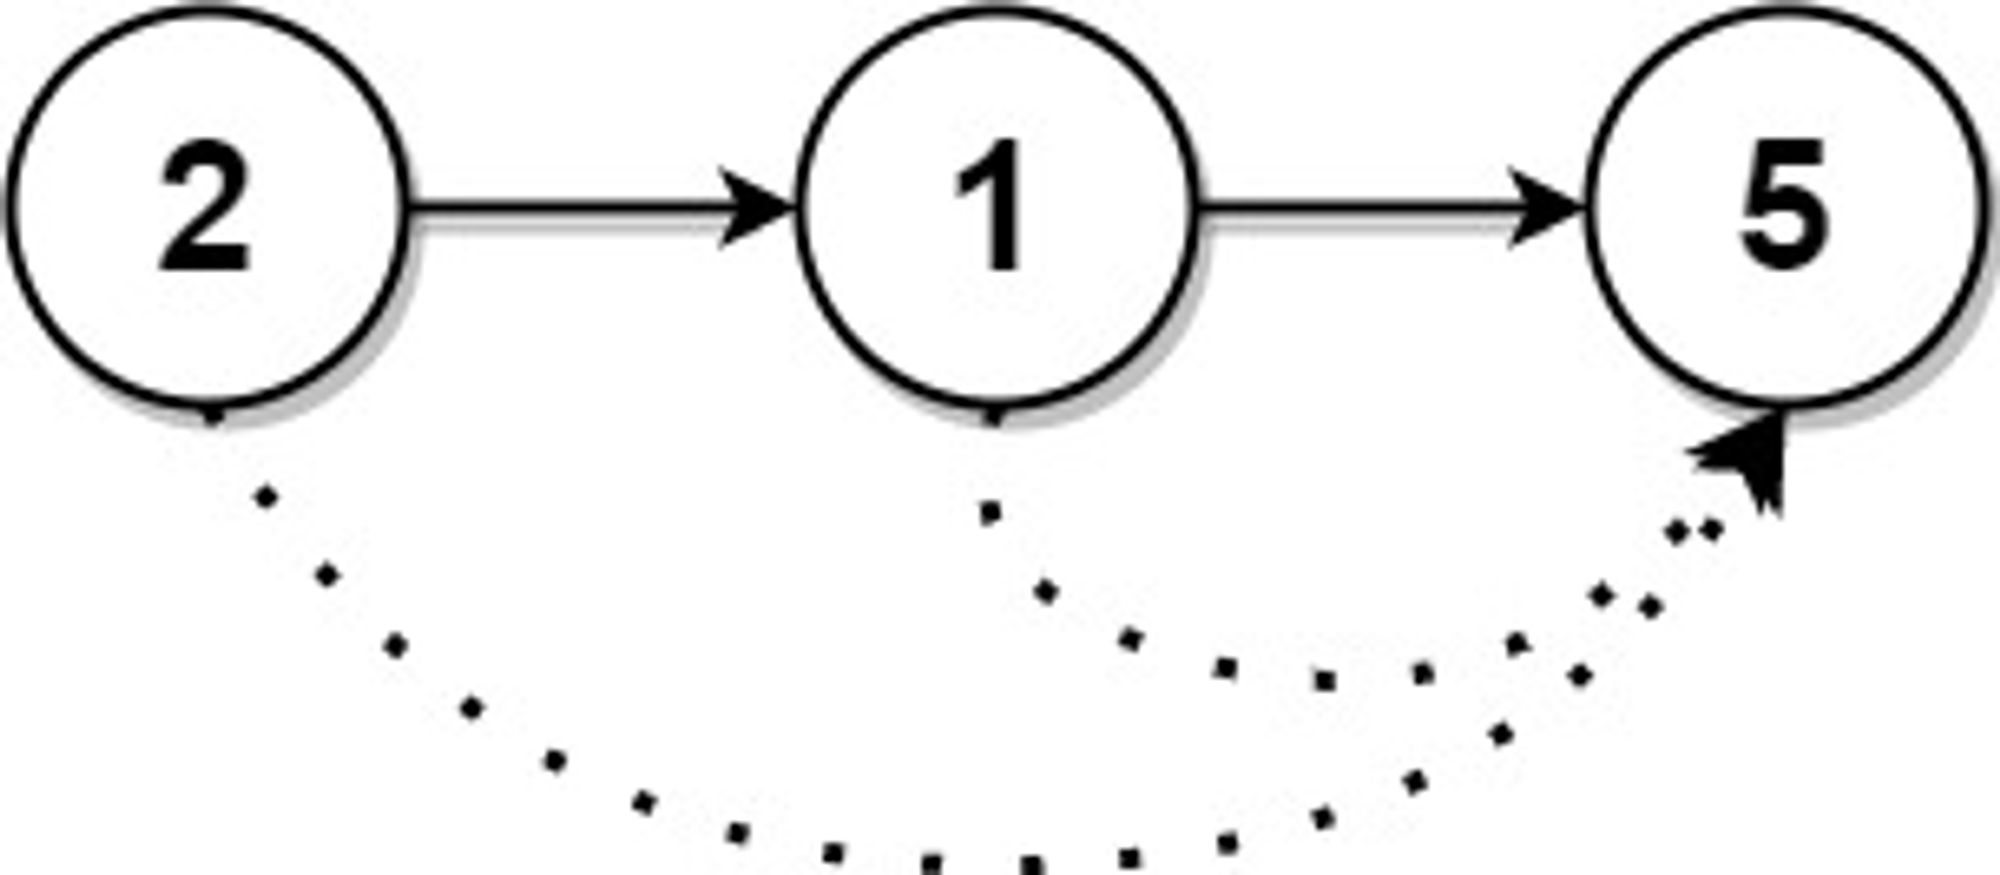
Input: head = [2,1,5]
Output: [5,5,0]


# Algo

- Initialize an empty stack.
- Initialize an empty result array of size n with all elements set to 0.
- Iterate through the linked list:
    - While the stack is not empty and the value of the current node is greater than the value of the node at the top of the stack:
        - Pop the index from the stack.
        - Set the value of the popped index in the result array to the value of the current node.
    - Push the index of the current node onto the stack.
- Return the result array.

In [21]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextLargerNodes(head):
    stack = []
    result = []
    curr = head

    # Convert linked list values into a list
    while curr:
        result.append(curr.val)
        curr = curr.next

    # Iterate over the list and find next greater nodes
    for i in range(len(result)):
        while stack and result[i] > result[stack[-1]]:
            result[stack.pop()] = result[i]
        stack.append(i)

    # Set remaining elements to 0
    while stack:
        result[stack.pop()] = 0

    return result

# Create the linked list
head = ListNode(2)
head.next = ListNode(1)
head.next.next = ListNode(5)

# Call the function
result = nextLargerNodes(head)

# Print the result
print(result)


[5, 5, 0]


- The time complexity of this algorithm is O(n) since we traverse the linked list once. 
- The space complexity is O(n) as well, considering the space used by the stack and the result array.

# Question 8

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**

```
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

```

**Example 2:**
Input: head = [1,2,3,-3,4]
Output: [1,2,4]


# Algo

- Create a dummy node and set its next pointer to the head of the linked list.
- Initialize a variable prefix_sum to keep track of the running sum.
- Initialize an empty dictionary prefix_sum_map to store the prefix sums encountered so far.
- Initialize a current node pointer curr to the dummy node.
- Traverse the linked list using the curr pointer:
    - Add the value of the current node to the prefix_sum.
    - Check if the prefix_sum is already present in the prefix_sum_map.
        - If present, it means there is a subsequence with a sum of zero.
            - Get the previous node prev from the prefix_sum_map.
            - Update the next pointer of prev to skip the subsequence from prev.next to curr.next.
        - If not present, add the current prefix_sum and its corresponding curr node to the prefix_sum_map.
    - Move the curr pointer to the next node.
- Return the next pointer of the dummy node, which represents the head of the modified linked list.

In [23]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    dummy = ListNode(0)  # Dummy node to handle removal of the original head
    dummy.next = head
    prefix_sum = 0
    prefix_sum_map = {}
    curr = dummy

    while curr:
        prefix_sum += curr.val
        if prefix_sum in prefix_sum_map:
            # Remove the subsequence that sums to zero
            prev = prefix_sum_map[prefix_sum]
            prev.next = curr.next
        else:
            prefix_sum_map[prefix_sum] = curr
        curr = curr.next

    return dummy.next

# Create the linked list
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(-3)
head.next.next.next = ListNode(3)
head.next.next.next.next = ListNode(1)

# Call the function
result = removeZeroSumSublists(head)

# Print the result
while result:
    print(result.val, end=" ")
    result = result.next


3 1 

- The time complexity of this algorithm is O(n), where n is the number of nodes in the linked list, as we traverse the list only once.
- The space complexity is O(n) as well, to store the prefix sums in the prefix_sum_map.